In [1]:
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('quartz/out_log_full_complete.csv', header=None, names=['pkg', 'cfg', 'iter', 'setup', 'load', 'ground', 'solve', 'total', 'dep_len'])
df_full = df

In [3]:
packs = df_full['pkg']
pk_ls = sorted(list(set(packs)))
print(len(pk_ls))

5748


In [4]:
confs = df_full['cfg']
cfg_ls = list(set(confs))
print(cfg_ls)

[' handy', ' trendy', ' many', ' tweety']


In [5]:
phases = ['setup', 'load', 'ground', 'solve', 'total']

In [6]:
timings = {}

for cf in cfg_ls:
    timings[cf] = {}
    for ph in phases:
        timings[cf][ph] = []
    for pk in pk_ls:
        tmp_df = df_full[df_full['pkg'] == pk]
        tdf = tmp_df[tmp_df['cfg'] == cf]
        for ph in phases:
            timings[cf][ph].append(tdf[ph].median())

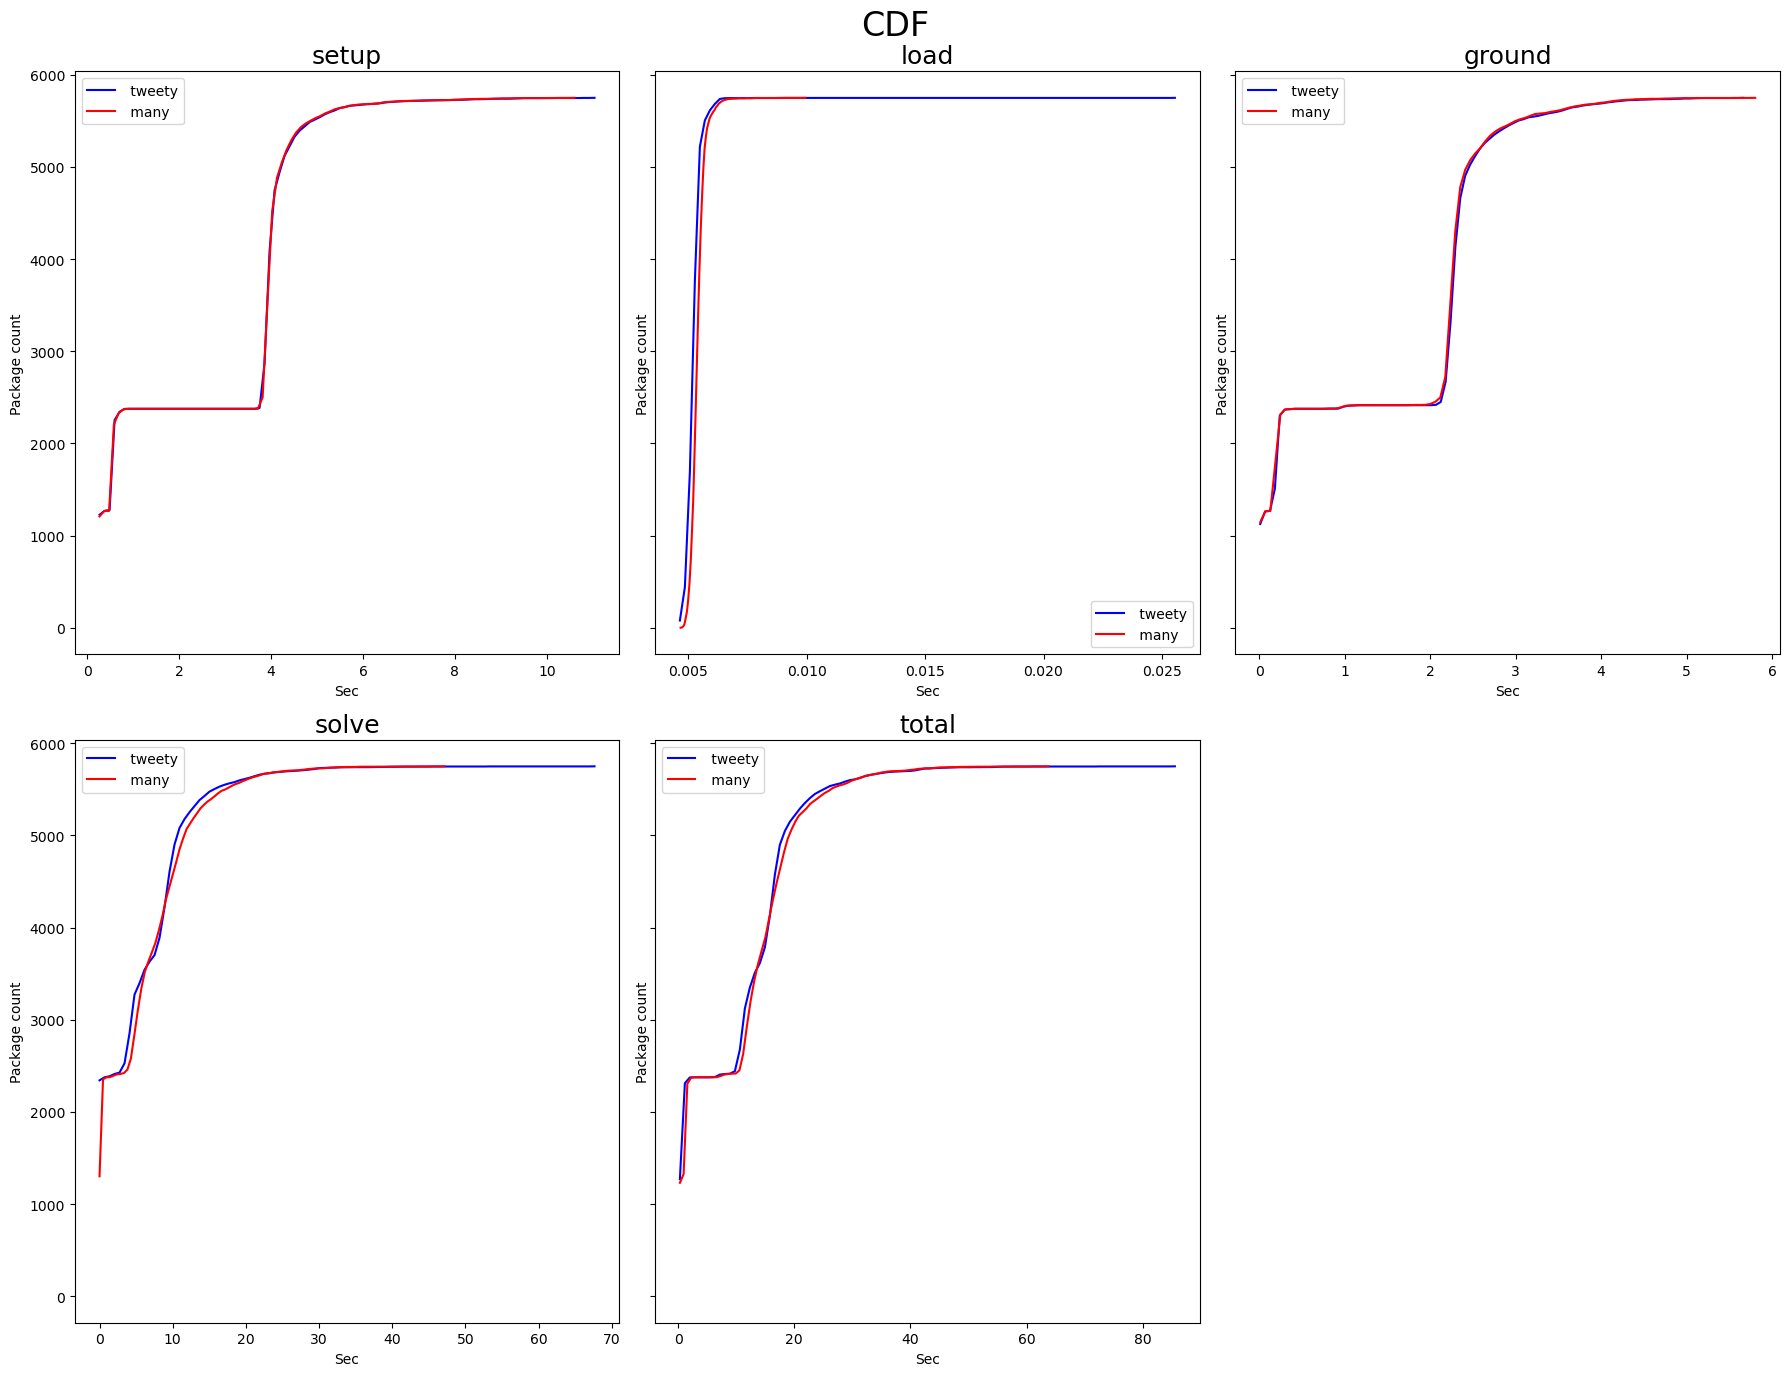

In [10]:
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True, figsize=(18,14), dpi=100)
axes = list(axs.flatten())
n_bins = 100

fig.suptitle('CDF', fontsize=24)

axes[5].remove()

cfgs = [' tweety', ' many']

for cf in cfgs:
    for i, ph in enumerate(phases):
        solve_times = sorted(zip(pk_ls, timings[cf][ph]), key=lambda x: x[1], reverse=True)
        tab_data = [[p, "{:.3f}".format(t)] for p, t in solve_times[0:5]]
        arr = np.array(sorted(timings[cf][ph], reverse=True))
        values, base = np.histogram(arr, bins=n_bins)
        cumulative = np.cumsum(values)
    #         print(solve_times[0:5])
    #         [p for p, t in solve_times[0:5]]

    #         axes[i].hist(sorted(tms[cf_base][ph], reverse=True), n_bins, label=ph, density=True, cumulative=True)
        if cf == ' tweety':
            axes[i].plot(base[:-1], cumulative, c='blue', label=cf)
    #        axes[i].hist(sorted(tms[cf_base][ph], reverse=True), n_bins, label=ph)
        else:
            axes[i].plot(base[:-1], cumulative, c='red', label=cf)
#             axes[i].hist(sorted(tms[cf_base][ph], reverse=True), n_bins, label=ph, density=True, cumulative=True, c='blue', label='single-shot')
        axes[i].legend(fontsize='medium')
    #         tab = axes[i].table(cellText=[["{:.3f}".format(t) for p, t in solve_times[0:5]], [p for p, t in solve_times[0:5]]],
    #                       rowLabels=['times', 'pkg'],
        axes[i].set_title(ph, fontsize=18)
        axes[i].set_xlabel('Sec')
        axes[i].set_ylabel('Package count')
        axes[i].title.set_text(ph)
#         tab = axes[i].table(cellText=tab_data, bbox=[0.1, -0.5, 0.75, 0.4])
#         tab.auto_set_font_size(False)
#         tab.auto_set_column_width(col=[0, 1])
#         tab.set_fontsize(12)
# plt.show()
plt.savefig('cdf_quartz_fig.png', dpi=150)